# Forecasting AI and ML Job Trends with SARIMA

Here, we filter out AI/ML/DS jobs using Keyword Matching

## Dependencies

In [1]:
import re
from collections import Counter

import pandas as pd
import matplotlib.pyplot as plt

from IPython.display import display, Markdown

from wordcloud import WordCloud

## Data Loading

In [2]:
filename = "data/a_job_postings_normalized.parquet"
job_postings = pd.read_parquet(filename)

In [3]:
print(f"{len(job_postings):,} job postings loaded from {filename}")
job_postings.sample(5)

1,296,381 job postings loaded from data/a_job_postings_normalized.parquet


,last_processed_time,got_summary,got_ner,is_being_worked,job_title,company,job_location,first_seen,search_city,search_country,search_position,job_level,job_type,job_skills,skills_count
368111,2024-01-19 09:45:09.215838+00,t,t,f,rn,sunrise senior living,"overland park, ks",2024-01-13,shawnee,united states,nurse infection control,mid senior,onsite,"[nursing, resident care, health care, medical,...",23
529012,2024-01-19 09:45:09.215838+00,t,t,f,volunteer: stem teaching fellowship in california,nonprofits first,"riverside, ca",2024-01-13,fontana,united states,computer programmer,associate,onsite,"[stem teaching, guest teaching, data analyst, ...",13
425077,2024-01-19 09:45:09.215838+00,t,t,f,assistant principal - woodbury ms,clark county school district,"las vegas, nv",2024-01-12,las vegas,united states,abstractor,mid senior,onsite,"[school administration, resume writing, work h...",3
538996,2024-01-19 09:45:09.215838+00,t,t,f,"volunteer: garden, educate, & feed our neighbo...",foothill unity center,"monrovia, ca",2024-01-12,la habra,united states,chef,associate,onsite,"[volunteering, cooking, gardening, food insecu...",21
101486,2024-01-19 18:11:08.66737+00,t,t,f,store manager - spencer's,spencer's,"glen carbon, il",2024-01-14,ferguson,united states,stock-control supervisor,mid senior,onsite,"[store management, guest services, profitabili...",14


## Job Filtering using Keyword Matching

Use 150 most common AI/ML job terms

In [4]:
ai_ml_terms = """
artificial intelligence, machine learning, deep learning, neural networks, computer vision, natural language processing, large language model, reinforcement learning, supervised learning, unsupervised learning, semi-supervised learning, transfer learning, predictive modeling, classification, regression, clustering, convolutional neural networks, cnn, rnn, long short-term memory, lstm, gan, generative adversarial networks, support vector machine, svm, random forests, decision trees, ensemble learning, feature engineering, feature selection, data preprocessing, data mining, big data, data science, data analysis, data visualization, sentiment analysis, chatbots, speech recognition, image recognition, object detection, time series analysis, recommender systems, autonomous systems, robotics, chatbot development, nlp algorithms, tensorFlow, keras, pytorch, scikit-learn, openai, machine learning algorithms, model training, model evaluation
"""

ai_ml_frameworks = """
Python, R, Julia, SQL, Apache Spark, Databricks, Jupyter Notebook, Google Cloud AI Platform, Amazon SageMaker, Microsoft Azure Machine Learning, Docker, Kubernetes, Git, GitHub, Anaconda, Weights & Biases, MLflow, Apache Kafka, Airflow, Tableau, Power BI, Looker, MATLAB, Scala, C++, Java, PySpark, Databricks, Snowflake, BigQuery, Vertex AI, OpenCV, NLTK, spaCy, Gensim, Hugging Face Transformers, Ray, Dask, Kedro, DVC (Data Version Control), Great Expectations, Kedro, Weights & Biases, Streamlit, FastAPI, Dash, Flask, XGBoost, LightGBM
"""

ai_ml_acronyms = """
RAG, LLM, GenAI, ML, DL, NLP, CV, RL, GAN, CNN, RNN, LSTM, SVM, SAA, AGI, AIoT, HCI, TF, PyTorch, KNN, SVD, BERT, GPT, T5, VAE, BIM, BOM, IoT, CICD, MLOps, AI/ML, API, RPA, ETL, DNN, RNN, BFS, AIaaS, MLaaS, DLaaS, Jupyter, K8s, EDA, RNN, BERT, VQA, CVPR, MT, FL, AI-ML, Keras, XLNet
"""

ai_terms_list = [item.strip() for item in ai_ml_terms.split(",")]
ai_ml_frameworks_list = [item.strip() for item in ai_ml_frameworks.split(",")]
ai_acronyms_list = [item.strip() for item in ai_ml_acronyms.split(",")]

ai_ml_keywords = set(ai_terms_list + ai_ml_frameworks_list + ai_acronyms_list)

print(f"Number of AI/ML keywords: {len(ai_ml_keywords)}")


Number of AI/ML keywords: 150


Job post filtering using vectorized pandas string operations

In [5]:
def combine_row_text(row):
    return f"{row['job_title']} {row['search_position']} {row['company']} {', '.join(row['job_skills'])}".lower()

def filter_ai_ml_jobs(df):
    # Convert keywords to lowercase pattern once, using word boundaries
    pattern = '|'.join(r'\b' + re.escape(keyword.lower()) + r'\b' for keyword in ai_ml_keywords)

    # Combine columns into a single text column
    combined_text = df.apply(combine_row_text, axis=1)

    # Vectorized case-insensitive search
    mask = combined_text.str.contains(pattern, regex=True)
    return df[mask]

In [6]:
ai_ml_jobs = filter_ai_ml_jobs(job_postings)

In [7]:
print(f"Number of AI/ML jobs: {ai_ml_jobs.shape[0]:,}")

print(f"Percentage of AI/ML jobs: {ai_ml_jobs.shape[0] / job_postings.shape[0]:.2%}")

Number of AI/ML jobs: 181,332
Percentage of AI/ML jobs: 13.99%


In [8]:
ai_ml_jobs.head()

,last_processed_time,got_summary,got_ner,is_being_worked,job_title,company,job_location,first_seen,search_city,search_country,search_position,job_level,job_type,job_skills,skills_count
14,2024-01-21 02:01:10.496553+00,t,t,f,"senior associate, tax - product analyst",kpmg us,"chicago, il",2024-01-14,calumet city,united states,stand-in,associate,onsite,"[microsoft office suite, uml, flow charting so...",20
21,2024-01-21 06:01:19.472942+00,t,t,f,test conductor - space systems,northrop grumman,"gilbert, az",2024-01-15,chandler,united states,conductor,mid senior,onsite,"[electrical engineering, requirements derivati...",13
23,2024-01-21 06:01:12.676071+00,t,t,f,"builder territory manager - seattle , wa",shaw industries,"seattle, wa",2024-01-16,bellevue,united states,exhibit builder,mid senior,onsite,"[flooring sales, interior design, sales, commu...",17
25,2024-01-21 06:01:13.56896+00,t,t,f,property manager,knight dragon ltd,"royal borough of greenwich, england, united ki...",2024-01-14,basildon,united kingdom,river,mid senior,onsite,"[english (language), cv (document), europe (lo...",5
27,2024-01-21 06:01:13.73724+00,t,t,f,bombardier - agent de sécurité,securitas canada,"montreal, quebec, canada",2024-01-14,côte-saint-luc,canada,safety manager,mid senior,onsite,"[security guard, aviation security, access con...",16


Plot the top N AI and ML skills in demand.

In [24]:
def visualize_skill_demand(df, top_n=20, min_liklihood=0):
    title = (
        f"Top {top_n} AI and ML Skills in Demand (> {min_liklihood} Likelihood count)"
        if min_liklihood > 0
        else f"Top {top_n} AI and ML Skills in Demand"
    )
    all_skills = [skill for sublist in df["job_skills"] for skill in sublist]
    skill_counts = Counter(all_skills)

    top_k_skills = skill_counts.most_common(top_n)
    skills, counts = zip(*top_k_skills)

    plt.figure(figsize=(8, 6))
    plt.barh(skills, counts, color="blue", alpha=0.9)
    plt.title(title)
    plt.xlabel("Number of Job Postings")
    # plt.ylabel('Skills')
    plt.gca().invert_yaxis()
    plt.grid(True, alpha=0.3)
    plt.show()

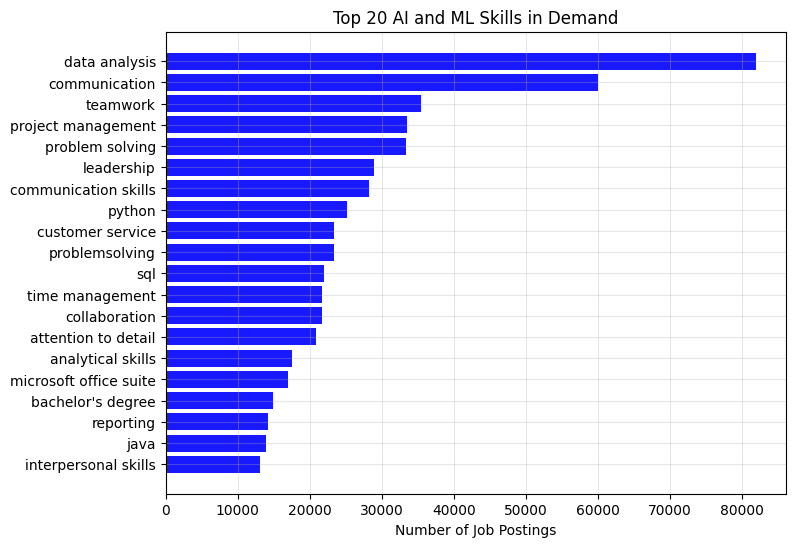

In [25]:
visualize_skill_demand(ai_ml_jobs, top_n=20, min_liklihood=0)

## Job Filtering Using Keyword Likelihood

In [11]:
def classify_with_keywords(df):
    # Combine relevant columns into a single text column
    combined_text = df.apply(
        lambda row: combine_row_text(row),
        axis=1,
    )

    # Create a pattern with word boundaries for all keywords
    pattern = "|".join(
        r"\b" + re.escape(keyword.lower()) + r"\b" for keyword in ai_ml_keywords
    )

    # Count occurrences of keywords in the combined text
    df["keyword_count"] = combined_text.str.count(pattern, flags=re.IGNORECASE)

    # Calculate likelihood and reason
    df["keyword_likelihood"] = df["keyword_count"].apply(
        lambda count: min(100, int((count / len(ai_ml_keywords)) * 100))
    )
    # df["keyword_reason"] = df["keyword_count"].apply(
    #     lambda count: f"Found {count} AI/ML/DS keywords in job title and skills."
    # )

    return df


In [12]:
job_postings = classify_with_keywords(job_postings)

In [13]:
ai_ml_ds_jobs = job_postings[job_postings["keyword_likelihood"] > 0]

In [14]:
print(f"Number of potential AI/ML jobs: {ai_ml_ds_jobs.shape[0]:,}")

Number of potential AI/ML jobs: 62,621


In [15]:
ai_ml_ds_jobs.sample(5)

,last_processed_time,got_summary,got_ner,is_being_worked,job_title,company,job_location,first_seen,search_city,search_country,search_position,job_level,job_type,job_skills,skills_count,keyword_count,keyword_likelihood
750784,2024-01-20 03:30:56.215139+00,t,t,f,first year tax professional,h&r block,"federal way, wa",2024-01-14,summit,united states,tax preparer,mid senior,onsite,"[customer service, retail sales, marketing, te...",14,2,1
264392,2024-01-19 09:45:09.215838+00,t,t,f,data engineer,digital waffle,"nottingham, england, united kingdom",2024-01-12,mansfield,united kingdom,agricultural-research engineer,associate,onsite,"[data warehousing, big data, etl, sql, data mo...",26,7,4
897044,2024-01-20 12:32:21.934155+00,t,t,f,"category manager, combination product / device...",abbvie,"lake county, il",2024-01-14,newport,united states,procurement engineer,mid senior,onsite,"[third party manufacturing, procurement, sourc...",51,2,1
792162,2024-01-20 02:43:57.126788+00,t,t,f,senior business analyst,princeton university,"princeton, nj",2024-01-14,trenton,united states,management analyst,mid senior,onsite,"[business analysis, business process documenta...",25,2,1
841314,2024-01-20 05:01:49.134845+00,t,t,f,first year tax professional,h&r block,"milwaukee, wi",2024-01-14,milwaukee,united states,tax clerk,mid senior,onsite,"[tax interviews, tax return preparation, busin...",24,2,1


## Adding labels to AI jobs

Save the filtered AI/ML/DS job postings to a new parquet file

In [16]:
ai_ml_ds_jobs.to_parquet("data/b_job_postings_ai_ml_ds.parquet")

## Keyword Analysis

Filter the DataFrame based on the minimum keyword likelihood.

In [17]:
def filter_by_likelihood(df, min_likelihood=0):
    return df[df["keyword_likelihood"] >= min_likelihood]

Plot the distribution of keyword likelihood across job postings.

In [18]:
def plot_keyword_likelihood_distribution(df, min_liklihood=0):    
    likelihood_distribution = (
    df["keyword_likelihood"]
        .value_counts()
        .sort_index()
    )

    plt.figure(figsize=(8, 5))
    likelihood_distribution.plot(kind="bar", color="blue", alpha=0.7)
    plt.title(f"Distribution of Keyword Likelihood Count (> {min_liklihood})")
    plt.xlabel("Keyword Likelihood")
    plt.ylabel("Count")
    plt.xticks(rotation=45)
    plt.grid(True, alpha=0.3)
    plt.show()

Perform frequency analysis of AI-related skills across job postings.

In [19]:
def frequency_analysis_of_skills(df):
    all_skills = [skill.lower() for skills in df["job_skills"] for skill in skills]
    return Counter(all_skills)

Create a word cloud visualization of popular AI skills

In [20]:
def create_word_cloud(df):
    skill_counts = frequency_analysis_of_skills(df)

    wordcloud = WordCloud(
        width=800, height=400, background_color="white"
    ).generate_from_frequencies(skill_counts)

    plt.figure(figsize=(10, 6))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.show()

In [21]:
def analyze_jobs(min_likelihood = 5):
    filtered_jobs = filter_by_likelihood(ai_ml_ds_jobs, min_likelihood=min_likelihood)
    
    display(Markdown(f"### **Keword Analysis for Mimumum Likelihood count of {min_likelihood}**"))
    display(Markdown(f"Percentage of jobs with at least {min_likelihood} likelihood count: **{filtered_jobs.shape[0] / job_postings.shape[0]:.2%}**"))
    display(Markdown(f"Number of jobs with at least {min_likelihood} likelihood count: **{filtered_jobs.shape[0]:,}**"))

    plot_keyword_likelihood_distribution(filtered_jobs, min_liklihood=min_likelihood)

    visualize_skill_demand(filtered_jobs, top_n=20, min_liklihood=min_likelihood)

    create_word_cloud(filtered_jobs)

### **Keword Analysis for Mimumum Likelihood count of 0**

Percentage of jobs with at least 0 likelihood count: **4.83%**

Number of jobs with at least 0 likelihood count: **62,621**

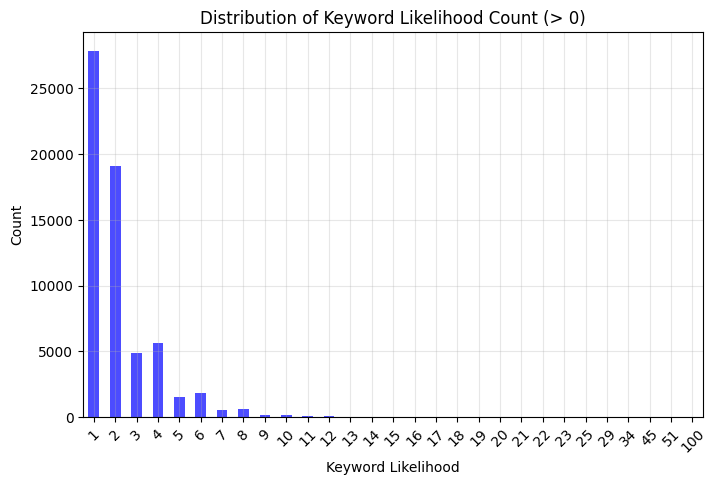

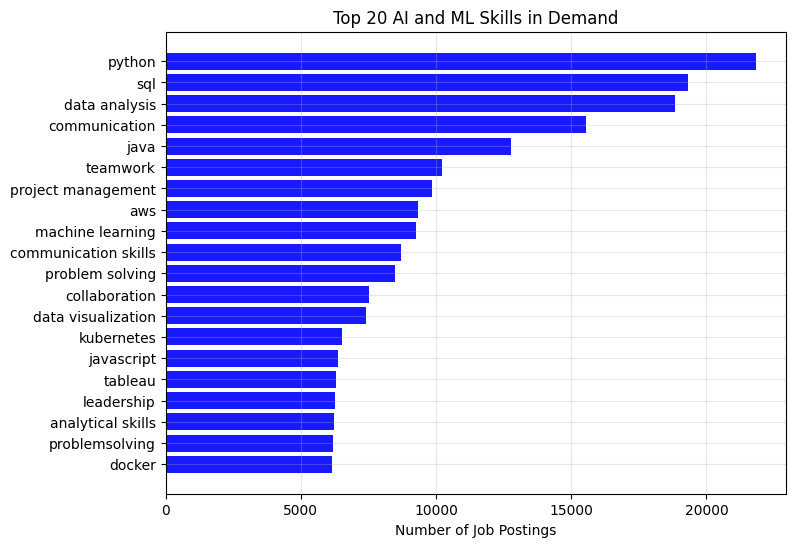

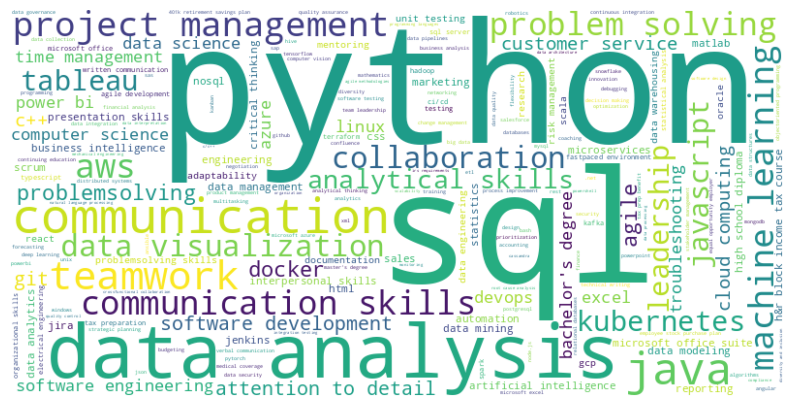

In [22]:
analyze_jobs(min_likelihood=0)

### **Keword Analysis for Mimumum Likelihood count of 8**

Percentage of jobs with at least 8 likelihood count: **0.09%**

Number of jobs with at least 8 likelihood count: **1,175**

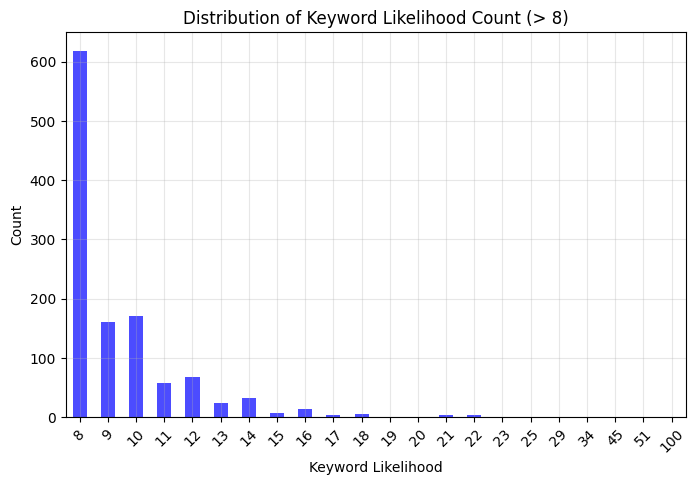

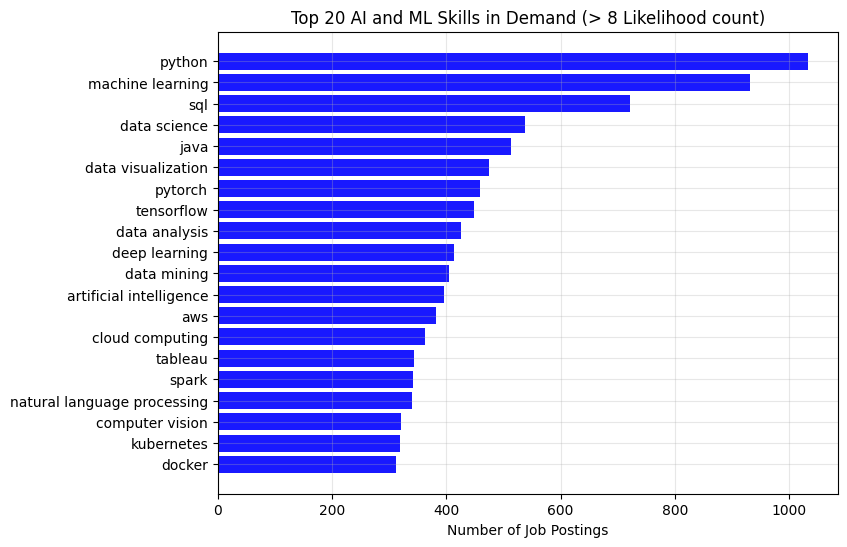

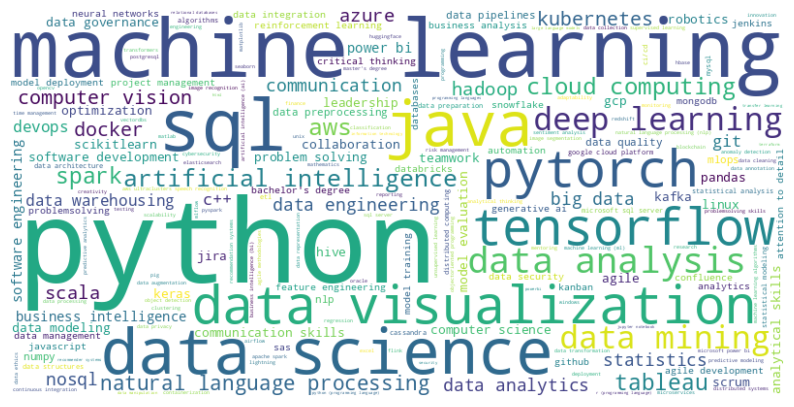

In [23]:
analyze_jobs(min_likelihood=8)